In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-posting-on-glassdoor/Uncleaned_DS_jobs.csv
/kaggle/input/data-science-job-posting-on-glassdoor/Cleaned_DS_Jobs.csv


Exploration


In [2]:
df = pd.read_csv('../input/data-science-job-posting-on-glassdoor/Cleaned_DS_Jobs.csv')
dfc = df.copy()
dfc

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,...,31,1,1,1,0,0,1,1,data scientist,na
656,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,-1,0,0,0,0,0,0,0,data scientist,na
657,Data Scientist,105-167,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,-1,1,1,1,0,0,1,0,data scientist,na
658,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,...,-1,1,0,1,1,0,0,1,data scientist,na


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

In [4]:
df['job_simp'].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'mle',
       'manager', 'director'], dtype=object)

In [5]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from matplotlib import colors 

 Buttons for Visualization

In [6]:
dfj = df['job_simp'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfj.drop(dfj[dfj['index'] =='na'].index, inplace=True)

dfc = df['Company Name'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfs = df['avg_salary'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['Location'].value_counts().head(10).sort_values(ascending = True).reset_index()

In [7]:
fig = go.Figure()
fig.add_trace(go.Bar(x = dfj['job_simp'],
                     y = dfj['index'],
                     orientation='h',
                     name = 'Job Title',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfc['Company Name'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = '#D9594C')))

fig.add_trace(go.Bar(x = dfs['avg_salary'],
                     y = dfs['index'],
                     orientation='h',
                     name = 'Average Salary',
                     marker = dict(color = '#A26769')))

fig.add_trace(go.Bar(x = dfl['Location'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Location',
                     marker = dict(color = '#B8B08D')))


fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True,]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Job Title", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False,]}, 
                            {'showlegend' : True} 
                        ]), 

                dict(label='Company', 
                     method="update",
                     args=[ {"visible": [False, True,False, False,]}, 
                            {'showlegend' : True}]),
                
                dict(label='Salary', 
                     method="update", 
                     args=[ {"visible": [False,False, True, False,]}, 
                            {'showlegend' : True} 
                     ]), 
                
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, False, False, True,]}, 
                            {'showlegend' : True} 
                     ]), 
                
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 DS Jobs, Companies, Salary and Locations \n",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'LightCoral'))

fig.show()

Dropdown Menu:

In [8]:
dfd1 = df[df['job_simp']== 'data scientist']
dfd2 = df[df['job_simp']== 'analyst']
dfd3 = df[df['job_simp']== 'data engineer']
dfd4 = df[df['job_simp']== 'mle']
dfd5 = df[df['job_simp']== 'manager']
dfd6 = df[df['job_simp']== 'director']

In [9]:
Cdf1 = dfd1['Sector'].value_counts()[:10].reset_index()
Cdf2 = dfd2['Sector'].value_counts()[:10].reset_index()
Cdf3 = dfd3['Sector'].value_counts()[:10].reset_index()
Cdf4 = dfd4['Sector'].value_counts()[:10].reset_index()
Cdf5 = dfd5['Sector'].value_counts()[:10].reset_index()
Cdf6 = dfd6['Sector'].value_counts()[:10].reset_index()

In [10]:
Cdf2

,index,Sector
0,Information Technology,13
1,Finance,12
2,Business Services,7
3,Manufacturing,7
4,Insurance,5
5,Health Care,4
6,"Oil, Gas, Energy & Utilities",2
7,-1,1
8,Media,1
9,Transportation & Logistics,1


Drop the "-1" Value

In [11]:
Cdf1.drop(Cdf1[Cdf1['index'] =='-1'].index, inplace=True)
Cdf2.drop(Cdf2[Cdf2['index'] =='-1'].index, inplace=True)
Cdf3.drop(Cdf3[Cdf3['index'] =='-1'].index, inplace=True)
Cdf4.drop(Cdf4[Cdf4['index'] =='-1'].index, inplace=True)
Cdf5.drop(Cdf5[Cdf5['index'] =='-1'].index, inplace=True)
Cdf6.drop(Cdf6[Cdf6['index'] =='-1'].index, inplace=True)

In [12]:
Cdf2

,index,Sector
0,Information Technology,13
1,Finance,12
2,Business Services,7
3,Manufacturing,7
4,Insurance,5
5,Health Care,4
6,"Oil, Gas, Energy & Utilities",2
8,Media,1
9,Transportation & Logistics,1


In [13]:
fig = go.Figure()

fig.add_trace(go.Bar(x = Cdf1["index"],
                     y = Cdf1["Sector"],
                     marker = dict(color = 'Tomato'),
                     name = 'Data Scientist'))

fig.add_trace(go.Bar(x = Cdf2['index'],
                     y = Cdf2['Sector'],
                     name = 'Analyst',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = Cdf3['index'],
                     y = Cdf3['Sector'],
                     name = 'Data Engineer',
                     marker = dict(color = 'SteelBlue')))

fig.add_trace(go.Bar(x = Cdf4['index'],
                     y = Cdf4['Sector'],
                     name = 'Machine Learning Engineer',
                     marker = dict(color = '#B74F6F')))

fig.add_trace(go.Bar(x = Cdf5['index'],
                     y = Cdf5['Sector'],
                     name = 'Manager',
                     marker = dict(color = '#62A87C')))

fig.add_trace(go.Bar(x = Cdf5['index'],
                     y = Cdf5['Sector'],
                     name = 'Director',
                     marker = dict(color = 'CadetBlue')))


fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Data Scientist", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False, False,False]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label='Analyst', 
                     method="update", 
                     args=[ {"visible": [False, True, False,False, False,False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Data Engineer', 
                     method="update", 
                     args=[ {"visible": [False, False, True,False, False,False]}, 
                            {'showlegend' : True} 
                        ]),  
                dict(label='Machine Learning Engineer', 
                     method="update", 
                     args=[ {"visible": [False, False,False,True, False,False]}, 
                            {'showlegend' : True}]),
                dict(label='Manager', 
                     method="update", 
                     args=[ {"visible": [False, False, False,False, True,False]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label='Director', 
                     method="update", 
                     args=[ {"visible": [False, False, False,False, False,True]}, 
                            {'showlegend' : True} 
                        ]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of Sectors by DS Job Titles",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'LightCoral'))

fig.show()

**Word Cloud**

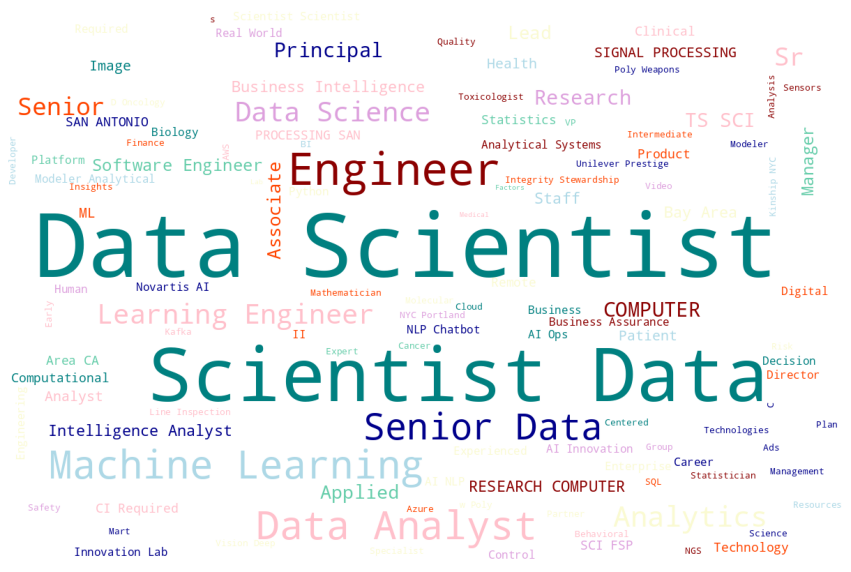

In [14]:
color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df['Job Title']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

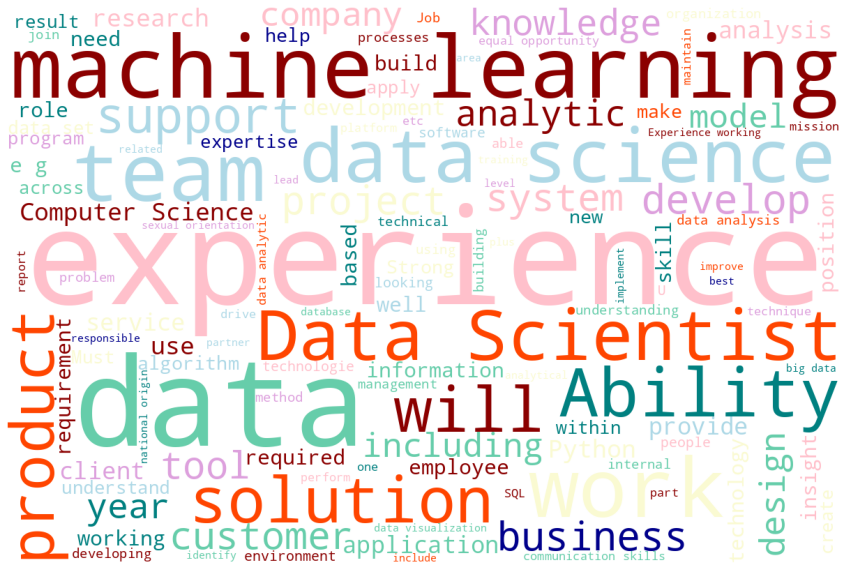

In [15]:
color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df['Job Description']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()